<a href="https://colab.research.google.com/github/guilpassos/Fuctura_Data_Science/blob/main/Fuctura_Python3_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs



In [2]:
#Criacao de 100 pontos separáveis
x, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2, random_state=123)


<ipython-input-6-b7bd4d04e117>:24: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
<ipython-input-6-b7bd4d04e117>:24: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
<ipython-input-6-b7bd4d04e117>:24: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
<ipython-input-6-b7bd4d04e117>:24: UserWarning: The following kwargs were not used by contour: 'linestyle'
  ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,


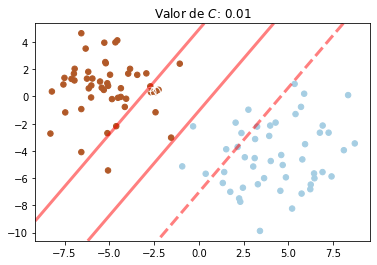

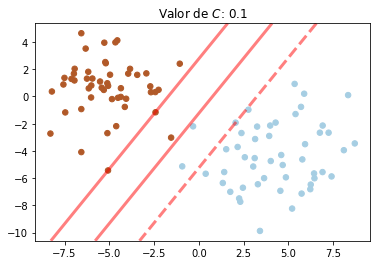

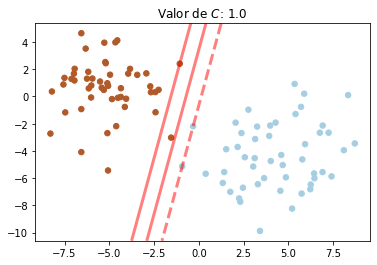

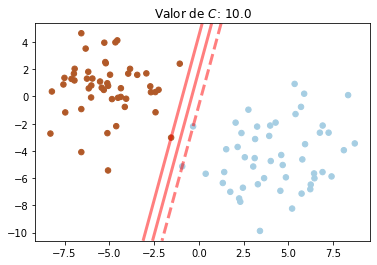

In [6]:
#Implementando SVM linear para níveis diferentes de C
for C in [1e-2, 1e-1, 1e0, 1e1]:
  clf = SVC(kernel='linear', C=C)
  clf.fit(x, y) #o fit serve para o treino do algoritmo

  plt.figure()
  plt.clf()
  plt.grid(False)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

  # plot funcao de decisao
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # criando grid para avaliar o modelo
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  # limites e margens de decisao da plotagem
  ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], alpha=0.5,
             linestyle=['--', '-', '--'], linewidths=3)
  # plot support vectors
  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, 
             linewidth=1, facecolors='none', edgecolors='w')
  plt.title(f'Valor de $C$: {C}')
plt.show()